# Substructure Searching with SMARTS

This notebook is inspired by, borrows from and expands upon <a href = "https://colab.research.google.com/github/PatWalters/practical_cheminformatics_tutorials/blob/main/fundamentals/SMARTS_tutorial.ipynb"> An introduction to the SMILES ARbitrary Target Specification (SMARTS)</a> from Pat Walter's <a href="https://github.com/PatWalters/practical_cheminformatics_tutorials?tab=readme-ov-file"> Cheminformatics Tutorials Github.</a> 
<div class="alert alert-block alert-info">
<h2>Learning Objectives</h2>

* Explore Substructure Searching:
  - Review SMILES (Simplified Molecular Input Line Entry System)
  - SMARTS (SMILES Arbitrary Target Specification)
* Explore RDKit and SMARTS
  - Chem.MolFromSmarts() method
  - Chem.HasSubstructMatch() method
  - Chem.GetSubstructMatch() method
* Practice code from previous notebooks

</div>


## Introduction to SMARTS

In the previous notebook, we explored how compounds can be stored in chemical databases using line notations such as SMILES, InChI, and InChIKeys. Each method has its benefits and challenges. We found that SMILES are non-canonical, meaning that a single molecule can be represented by multiple different SMILES strings. As a result, searching for a specific SMILES string may not yield a match if the database stores a different valid representation of the same molecule. This issue was addressed by the InChI format, which is canonical but not easily human-readable. Finally, we looked at InChIKeys, which are excellent for database searching due to their fixed-length, hash-like format. However, InChIKeys are one-way encodings, so the original structural data must be stored separately if reconstruction is needed.

In cheminformatics, searching for exact molecule matches isn't the only goal when interacting with a database. Frequently, we want to search for parts of molecules or "substructures" that contain specific chemical patterns or functional groups. This is particularly important for drug discovery, where known structural motifs may be required for biological activity at a given target. we would like to be able to search for similar molecules that contain those motifs. Being able to identify other molecules that contain such motifs allows researchers to prioritize compounds for synthesis, testing, or elimination based on the presence or absence of key substructures.

While SMILES presented challenges to searching for specific molecules, a extension of that system called SMARTS (SMILES Arbitrary Target Specification) was developed. Unlike SMILES, which encodes full molecules, SMARTS allows the specification of generalized substructures using a flexible, rule-based syntax. SMARTS share a lot of the same syntax as SMILES but there are a number of critical differences. At a simple level, any SMILES is also a valid SMARTS. This enables highly customizable pattern matching for substructure queries.

In this notebook, you will learn how to define SMARTS queries, apply them to molecular datasets using RDKit, and visualize the results. Whether you're designing a drug lead or mining a large chemical database, substructure searching with SMARTS is a powerful skill in your cheminformatics toolkit.

In [1]:
# setting up the environment for RDKit visualization in Jupyter notebooks
from rdkit import Chem  
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs

When performing a substructure search, we need two pieces of data: 
1) The *query*, which is the substructure or pattern we are searching for
2) The *target molecule*, often referred to as the *superstructure*, which is the molecule being searched

In RDKit, both the query and the target must first be converted into molecule objects. The query is typically defined using SMARTS, which allows for flexible and detailed pattern specification, while the target is usually defined using SMILES or read from a structure (MOL) file.

Once both are defined, RDKit provides tools to determine whether the query pattern exists within the target molecule. This allows us to search for a wide variety of structural features (such as functional groups, ring systems, or atom types) within larger chemical structures.

In the next example, we will demonstrate how to define both a query and a target, and use RDKit to check for the presence of a substructure match.

In [2]:
# Example to search for presence of a chlorine atom in a molecule

# Define the query SMARTS for a chlorine atom
chlorine_query = Chem.MolFromSmarts('[Cl]')

# Define the target molecule (butane in example 1)
butane = Chem.MolFromSmiles('CCCC')
chlorobutane = Chem.MolFromSmiles('CC(Cl)CC')
bromobutane = Chem.MolFromSmiles('CC(Br)CC')

# Check if the chlorine query matches the butane molecule
butane_match = butane.HasSubstructMatch(chlorine_query)
chlorobutane_match = chlorobutane.HasSubstructMatch(chlorine_query)
bromobutane_match = bromobutane.HasSubstructMatch(chlorine_query)

# Display the results
print(f"Does butane contain a chlorine atom? {butane_match}")
print(f"Does chlorobutane contain a chlorine atom? {chlorobutane_match}")
print(f"Does bromobutane contain a chlorine atom? {bromobutane_match}")


Does butane contain a chlorine atom? False
Does chlorobutane contain a chlorine atom? True
Does bromobutane contain a chlorine atom? False


Notice how the syntax places Cl in brackets to define the SMARTS query. Brackets are essential for writing robust and flexible substructure queries in cheminformatics. In the following code cell we will use SMARTS to determine if there are any halogens present in the target molecule.

In [3]:
# Example to search for presence of a halogen atom in a molecule

# Define the query SMARTS for a halogen atom
halogen_query = Chem.MolFromSmarts('[F,Cl,Br,I]') 

# Check if the halogen query matches the butane molecule
butane_match = butane.HasSubstructMatch(halogen_query)
chlorobutane_match = chlorobutane.HasSubstructMatch(halogen_query)
bromobutane_match = bromobutane.HasSubstructMatch(halogen_query)

# Display the results
print(f"Does butane contain a halogen atom? {butane_match}")
print(f"Does chlorobutane contain a halogen atom? {chlorobutane_match}")
print(f"Does bromobutane contain a halogen atom? {bromobutane_match}")

Does butane contain a halogen atom? False
Does chlorobutane contain a halogen atom? True
Does bromobutane contain a halogen atom? True


Now that you are getting a feel for the code, let's explore other patterns.

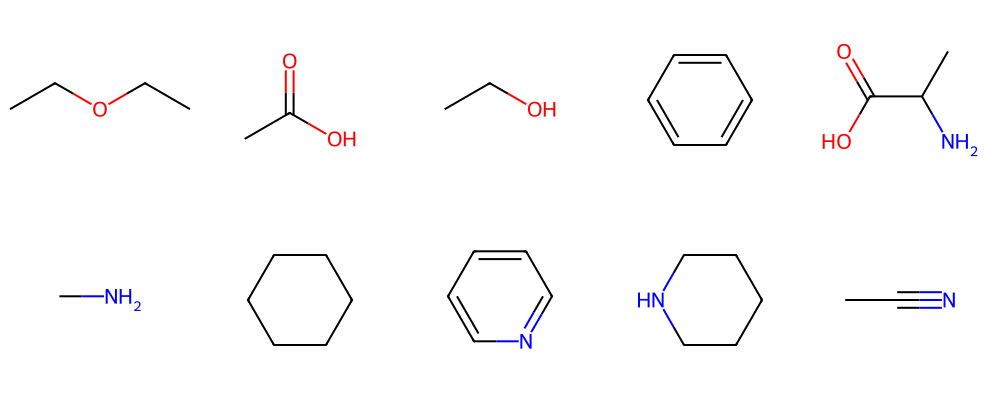

In [4]:
# Example SMILES strings to search against
smiles_list = [
    "CCOCC",        # diethyl ether
    "CC(=O)O",      # acetic acid
    "CCO",          # ethanol
    "c1ccccc1",     # benzene
    "CC(N)C(=O)O",  # alanine
    "CN",           # methylamine
    "C1CCCCC1",     # cyclohexane
    "C1=NC=CC=C1",  # pyridine
    "C1CCNCC1  ",   # piperidine
    "CC#N",         # acetonitrile
]
# Convert SMILES strings to RDKit molecules and visualize them
molecules = [Chem.MolFromSmiles(smi) for smi in smiles_list]
Draw.MolsToGridImage(molecules, molsPerRow=5)

<div class="alert alert-block alert-warning">
<strong>Check your understanding</strong><br>

What do the following RDKit methods do?
* Chem.MolFromSmiles()
* Chem.MolFromSmarts()

Before we explore SMARTS, make a note of the types of atoms present, functional groups present, rings and bond orders in molecules list that is displayed above.



<details>
<summary>Extra information about these methods</summary>

| Feature                 | `Chem.MolFromSmiles()`                       | `Chem.MolFromSmarts()`                            |
| ----------------------- | -------------------------------------------- | ------------------------------------------------- |
| **Purpose**             | Creates a full molecule from a SMILES string | Creates a substructure query from a SMARTS string |
| **Use case**            | Used for defining complete molecules         | Used for searching or matching substructures      |
| **Supports wildcards**  | No wildcards or logical operators            |Supports wildcards, atom/bond logic             |
| **Canonical structure** | Often canonicalized on input                 | Not canonicalized—intended for pattern-matching   |
| **Atom interpretation** | Assumes implicit atoms and bonds             | Requires more explicit atom typing                |


Aliphatic nitrogen compounds are organic molecules in which the nitrogen atom is bonded to carbon atoms in an open chain or a non-aromatic ring structure, rather than directly to an aromatic ring. 

In SMARTS, we can distinguish between aliphatic and aromatic nitrogen atoms using specific syntax:

* An aliphatic nitrogen is represented as [N], 
* An aromatic nitrogen is represented as [n].

 This distinction allows us to search selectively for different types of nitrogen environments within a target molecule. This can be an important capability when analyzing reactivity, functional group behavior, or biological activity.

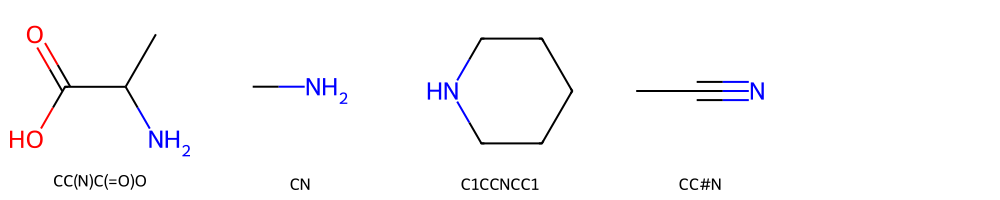

In [5]:
# Query to search for aliphatic nitrogen atoms
query_smarts = "N" # SMARTS for aliphatic nitrogen atoms
query_mol = Chem.MolFromSmarts(query_smarts) # Convert SMARTS to RDKit molecule

matches = [] # List to store matching molecules
# Perform substructure search
for mol in molecules:
    if mol.HasSubstructMatch(query_mol):  # Check if the molecule contains the substructure
        matches.append(mol)  # If it does, add it to the matches list   
        


# Visualize the matches
Draw.MolsToGridImage(matches, molsPerRow=5, subImgSize=(200, 200), legends=[Chem.MolToSmiles(mol) for mol in matches])


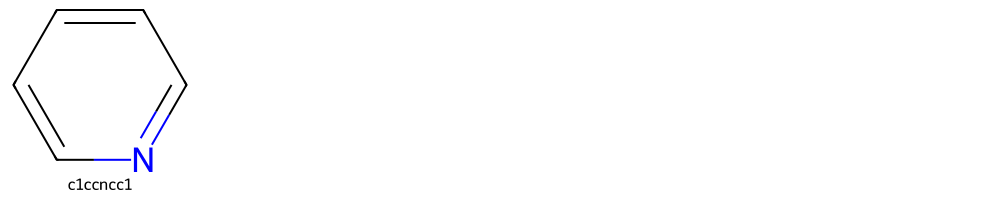

In [6]:
# Query to search for aromatic nitrogen atoms
query_smarts = "n" # SMARTS for aromatic nitrogen atoms
query_mol = Chem.MolFromSmarts(query_smarts) # Convert SMARTS to RDKit molecule

matches = [] # List to store matching molecules
# Perform substructure search
for mol in molecules:
    if mol.HasSubstructMatch(query_mol):  # Check if the molecule contains the substructure
        matches.append(mol)  # If it does, add it to the matches list   
        


# Visualize the matches
Draw.MolsToGridImage(matches, molsPerRow=5, subImgSize=(200, 200), legends=[Chem.MolToSmiles(mol) for mol in matches])

In our SMILES list we had 10 molecules, and each search limited us to finding either aliphatic or aromatic nitrogens. If we wanted to find **either** type of nitrogen, we can search by indicating the general atom by using its atomic number.

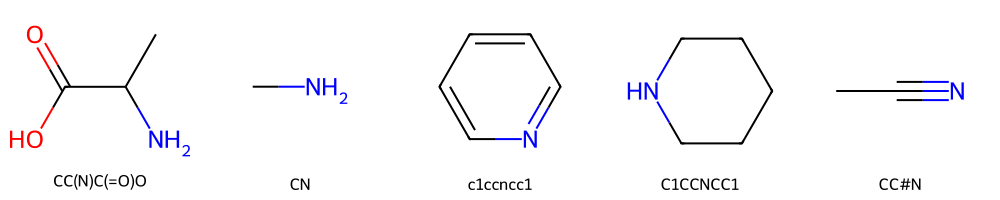

In [7]:
query_smarts = "[#7]" # SMARTS for any nitrogen atoms
query_mol = Chem.MolFromSmarts(query_smarts) # Convert SMARTS to RDKit molecule

matches = [] # List to store matching molecules
# Perform substructure search
for mol in molecules:
    if mol.HasSubstructMatch(query_mol):  # Check if the molecule contains the substructure
        matches.append(mol)  # If it does, add it to the matches list   

# Visualize the matches
Draw.MolsToGridImage(matches, molsPerRow=5, subImgSize=(200, 200), legends=[Chem.MolToSmiles(mol) for mol in matches])

In [8]:
# Example SMARTS patterns
smarts_patterns = {
    'Hydroxyl': '[OX2H]',
    'Carbonyl': '[CX3]=[OX1]',
    '6 membered aromatic ring': 'a1aaaaa1',
    'Primary amine': '[NX3;H2]',
    'Carboxylic acid': '[CX3](=O)[OX2H1]',
    'Nitrile': '[NX1]#[CX2]',
    'ether': '[O;D2]'
}

# Randomly select a SMARTS pattern
import random
selected_smarts = random.choice(list(smarts_patterns.values())) 
print(f"Selected SMARTS pattern: {selected_smarts}")

Selected SMARTS pattern: a1aaaaa1


<div class="alert alert-block alert-warning">
<strong>Check your understanding</strong><br>

The above code cell contains a list of SMARTS patterns and a randomly selected SMARTS pattern. In the code cell below write code to search the molcules list for your randomly selected SMARTS pattern.
</div>

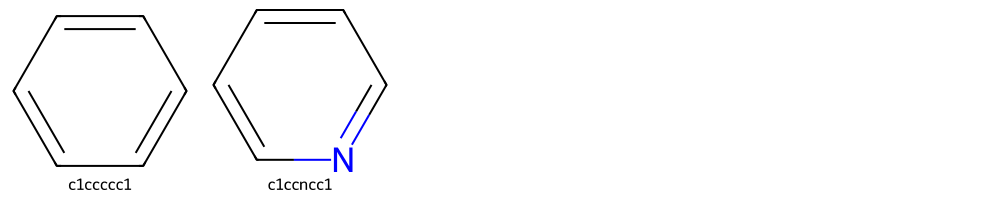

In [9]:
# write your code here to search the molecules list for your randomly selected SMARTS pattern


# KEY
query_mol = Chem.MolFromSmarts(selected_smarts)  # Convert SMARTS to RDKit molecule 
matches = []  # List to store matching molecules
# Perform substructure search   
for mol in molecules:
    if mol.HasSubstructMatch(query_mol):  # Check if the molecule contains the substructure
        matches.append(mol)  # If it does, add it to the matches list
# Visualize the matches
Draw.MolsToGridImage(matches, molsPerRow=5, subImgSize=(200, 200), legends=[Chem.MolToSmiles(mol) for mol in matches])

Another method for querying a target molecule in RDKit is the `GetSubstructMatch()` function. This method allows us to identify which atoms in the target molecule match a given substructure pattern. To use it, we first create a Mol object for the target molecule from a SMILES string, and define a query pattern using `MolFromSmarts()`.

When `GetSubstructMatch()` is called on the target molecule with the SMARTS query as an argument, it returns a tuple of atom indices that match the substructure. These indices can then be used to highlight the matching atoms when the molecule is displayed.

This is especially useful when visualizing functional groups or patterns directly on complex molecular structures.

In the following we are looking to find the methylenedioxy substructure in methylenedioxymethamphetamine(MDMA). Let's visualize MDMA first so we are familiar with the molecule's structure. 

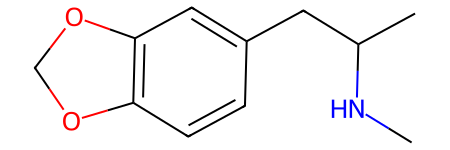

In [10]:
mdma = Chem.MolFromSmiles('CC(CC1=CC2=C(C=C1)OCO2)NC')  # Example SMILES for MDMA
IPythonConsole.drawOptions.addAtomIndices = False
mdma

Next, we need to generate the SMARTS query. A methylenedioxy group is a functional group consisting of a –O–CH₂–O– bridge connecting two adjacent positions on an aromatic ring. It looks like a 1,3-dioxole fused to a benzene ring. 

The pattern we are looking for is:
* two ring oxygen atoms
* connected by a methylene bridge

SMARTS allows for detailed specification of atomic properties using atom expressions, which can include both element type and structural context. For example, `[O;R1]` represents an oxygen atom that is part of a ring. The `O` indicates the atom is oxygen, while the `R1` is a ring membership descriptor specifying that the atom belongs to exactly one ring system. 

To ensure we have a methylene, rather than using `[C]` we want to make sure we have an aliphatic carbon with two hydrogens attached. This is achieved with `[CH2]`. 

 In the case of a methylenedioxy group, `[O;R1][CH2][O;R1]` is used to match the –O–CH₂–O– bridge where both oxygens are part of a ring, helping distinguish it from non-cyclic ethers.

MDMA matches for methylenedioxy group: (9, 10, 11)


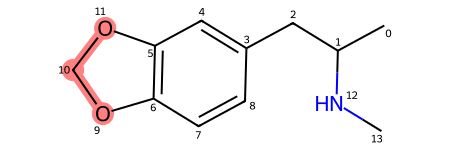

In [11]:
mdma = Chem.MolFromSmiles('CC(CC1=CC2=C(C=C1)OCO2)NC')  # Example SMILES for MDMA
query_smarts = "[O;R1][CH2][O;R1]"  # SMARTS for methylenedioxy group
new_query = Chem.MolFromSmarts(query_smarts)  # Set up SMARTS query for methylenedioxy group
mdma_matches = mdma.GetSubstructMatch(new_query)  # Get indices of matching
print(f"MDMA matches for methylenedioxy group: {mdma_matches}")
IPythonConsole.drawOptions.addAtomIndices = True
mdma

<div class="alert alert-block alert-warning">
<strong>Check your understanding</strong><br>

In the code cell below, show that benzene is a substructure of MDMA. 
</div>

MDMA matches for benzene group: (3, 4, 5, 6, 7, 8)


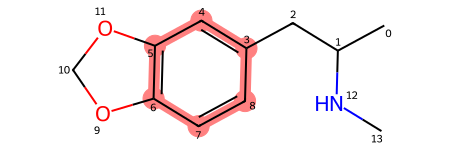

In [12]:
# write your code here

#key
mdma = Chem.MolFromSmiles('CC(CC1=CC2=C(C=C1)OCO2)NC')  # Example SMILES for MDMA
query_smarts = "c1ccccc1"  # SMARTS for benzene
new_query = Chem.MolFromSmarts(query_smarts)  # Example SMARTS for methylenedioxy group
mdma_matches = mdma.GetSubstructMatch(new_query)  # Get indices of matching
print(f"MDMA matches for benzene group: {mdma_matches}")
IPythonConsole.drawOptions.addAtomIndices = True
mdma

Let's go one step deeper. In the case of MDMA, we can see that there are two oxygens connected to an aromatic ring. Run the following code cell.

MDMA matches for phenol group: (4, 3, 8, 7, 6, 5, 11)


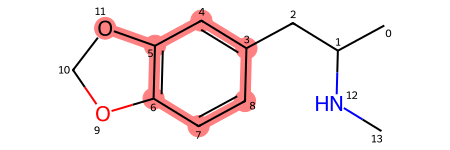

In [13]:
mdma = Chem.MolFromSmiles('CC(CC1=CC2=C(C=C1)OCO2)NC')  # Example SMILES for MDMA
query_smarts = "c1ccccc1[#8]"  # SMARTS for phenol
new_query = Chem.MolFromSmarts(query_smarts)  # Example SMARTS for methylenedioxy group
mdma_matches = mdma.GetSubstructMatch(new_query)  # Get indices of matching
print(f"MDMA matches for phenol group: {mdma_matches}")
IPythonConsole.drawOptions.addAtomIndices = True
mdma

Notice that the highlighted part of the molecule only shows one match even though the other oxygen could match as well. If you want to find all matching substructures you can use RDKit's `GetSubstructMatches()` method. This will return a tuple of all atom indices.

MDMA matches for phenol group: ((4, 3, 8, 7, 6, 5, 11), (5, 4, 3, 8, 7, 6, 9))


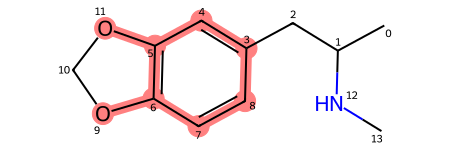

In [14]:
mdma = Chem.MolFromSmiles('CC(CC1=CC2=C(C=C1)OCO2)NC')  # Example SMILES for MDMA
query_smarts = "c1ccccc1[#8]"  # SMARTS for henol
new_query = Chem.MolFromSmarts(query_smarts)  # Example SMARTS for methylenedioxy group
mdma_matches = mdma.GetSubstructMatches(new_query)  # Get indices of matching
print(f"MDMA matches for phenol group: {mdma_matches}")
IPythonConsole.drawOptions.addAtomIndices = True
mdma

Alternatively, we could have indicated that we are looking for any oxygen connected to an aromatic carbon.

MDMA matches for oxygen connected to an aromatic carbon: ((5, 11), (6, 9))


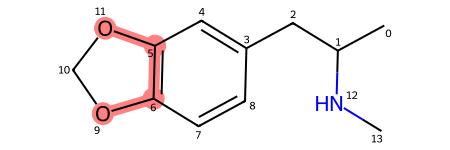

In [15]:
mdma = Chem.MolFromSmiles('CC(CC1=CC2=C(C=C1)OCO2)NC')  # Example SMILES for MDMA
query_smarts = "c[O]"  # # SMARTS for oxygen connected to an aromatic carbon
new_query = Chem.MolFromSmarts(query_smarts)  # Example SMARTS for methylenedioxy group
mdma_matches = mdma.GetSubstructMatches(new_query)  # Get indices of matching
print(f"MDMA matches for oxygen connected to an aromatic carbon: {mdma_matches}")
IPythonConsole.drawOptions.addAtomIndices = True
mdma

Curiously, the earlier visualization shows a highlight between atoms 5 and 6, which should not be highlighted based on our SMARTS pattern. This appears to be an artifact or misinterpretation. Our pattern is intended to match an aromatic carbon bonded to an oxygen, not a bond between two aromatic carbons.

To resolve this, we can redraw the molecule and manually specify the atoms and bonds to highlight. This approach gives us full control over what is visualized and avoids accidental highlights due to automatic matching behavior.

The variable `mdma_matches` is a list of tuples, where each tuple contains the atom indices for a substructure match. To highlight all matched atoms, we first need to flatten the tuples as a list:
```
[(5, 11), (6, 9)]  →  [5, 11, 6, 9]
```
With the flattened list of atoms, we can tell RDKit which atoms to highlight. Then, to highlight the correct bonds, we search for bonds between adjacent atoms within each match. This ensures we highlight the bond between atoms 5 and 11 (which are part of the same match), and not between atoms 5 and 6 (which are in different matches).

Finally, we redraw the molecule using RDKit’s more flexible drawing tools, specifying the atoms and bonds to highlight exactly as intended.

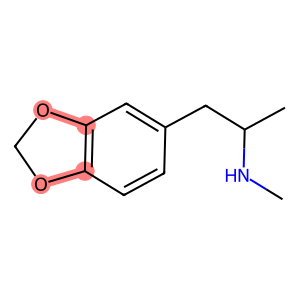

In [16]:
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

# Create new mol object and Kekulize
mol = Chem.Mol(mdma)


# Flatten list of matched atoms
highlight_atoms = list({atom_idx for match in mdma_matches for atom_idx in match})

# Find bonds between all *adjacent* atoms in each match
highlight_bonds = []
for match in mdma_matches:
    for i in range(len(match) - 1):
        bond = mol.GetBondBetweenAtoms(match[i], match[i + 1])
        if bond:  # Make sure a bond exists between the two atoms
            highlight_bonds.append(bond.GetIdx())

# Draw
drawer = rdMolDraw2D.MolDraw2DSVG(300, 300)
drawer.DrawMolecule(mol, highlightAtoms=highlight_atoms, highlightBonds=highlight_bonds)
drawer.FinishDrawing()
svg = drawer.GetDrawingText()
SVG(svg.replace('svg:', ''))  # Display SVG

<div class="alert alert-block alert-success">

<details>
<summary>Why this matters</summary>
Visualizing chemical substructures accurately is essential in cheminformatics and drug discovery. When RDKit highlights atoms and bonds based on a query, it’s easy to assume the output is always correct. But sometimes, unexpected highlights can occur due to default settings or overlapping matches.<br><br> By taking control of how atoms and bonds are highlighted, you’re not just fixing a display issue. You are learning how to verify results, debug molecular queries, and communicate chemical meaning more precisely. These are the same skills computational chemists use when developing structure-based filters, similarity searches, or pattern-based property prediction tools.<br><br> In short: <b>knowing what your code is highlighting, and why, helps you trust your results.</b>

In many situations, we want to define a query that matches more than one type of atom. For example, suppose we want a pattern that can match both benzene and pyridine (both are six-membered aromatic rings) but with different atoms at one position. This can be accomplished in SMARTS by using a comma-separated list of atom types enclosed in square brackets. To match either a carbon or nitrogen at the final ring position, we can use the SMARTS pattern:
```
c1cccc[c,n]1
```
This pattern matches both benzene (where the final atom is `c`) and pyridine (where it’s `n`). Notice that we are using lowercase `c` and `n` as we are indicating this is an aromatic ring.

One last thing about `GetSubstructMatches()` that you should be aware of. When displaying a single molecule in a Jupyter notebook, RDKit automatically highlights the matched atoms because `GetSubstructMatch()` sets the internal match information and Jupyter’s IPython integration checks for a stored match and highlights it using `__sssAtoms` behind the scenes.

Therefore, this only works for single molecules, because when you call a `mol` object alone, IPython draws it using special hooks behind the scenes. 

The following code shows you how to do this for a group. 

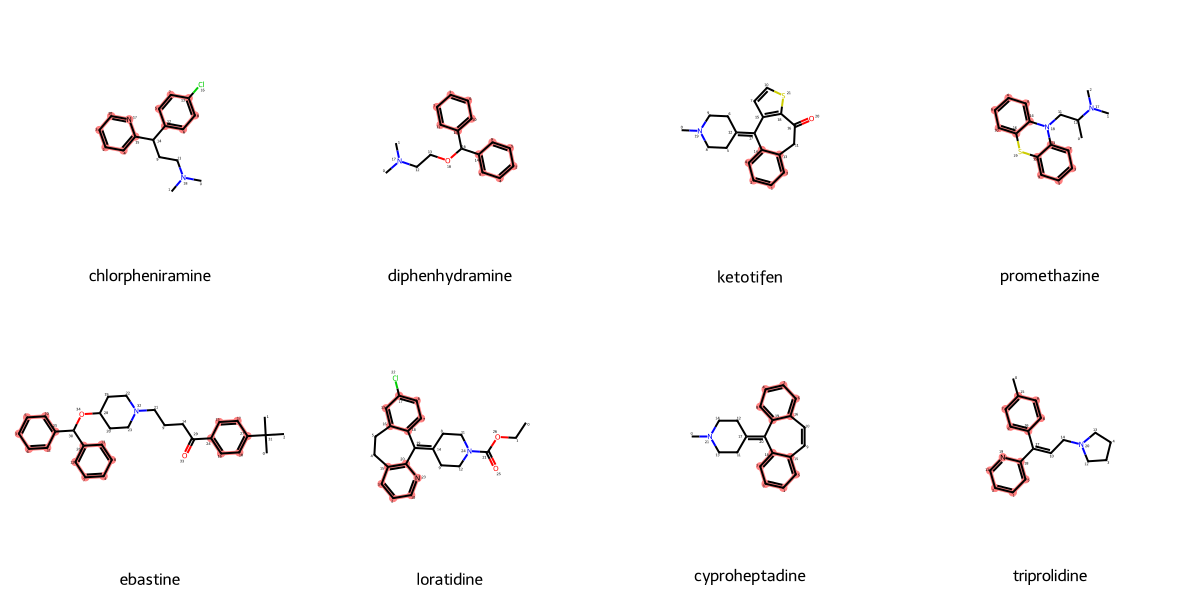

In [17]:
antihistamines = {
    'chlorpheniramine': 'InChI=1S/C16H19ClN2/c1-19(2)12-10-15(16-5-3-4-11-18-16)13-6-8-14(17)9-7-13/h3-9,11,15H,10,12H2,1-2H3',
    'diphenhydramine': 'InChI=1S/C17H21NO/c1-18(2)13-14-19-17(15-9-5-3-6-10-15)16-11-7-4-8-12-16/h3-12,17H,13-14H2,1-2H3',
    'ketotifen': 'InChI=1S/C19H19NOS/c1-20-9-6-13(7-10-20)18-15-5-3-2-4-14(15)12-17(21)19-16(18)8-11-22-19/h2-5,8,11H,6-7,9-10,12H2,1H3',
    'promethazine': 'InChI=1S/C17H20N2S/c1-13(18(2)3)12-19-14-8-4-6-10-16(14)20-17-11-7-5-9-15(17)19/h4-11,13H,12H2,1-3H3',
    'ebastine': 'InChI=1S/C32H39NO2/c1-32(2,3)28-18-16-25(17-19-28)30(34)15-10-22-33-23-20-29(21-24-33)35-31(26-11-6-4-7-12-26)27-13-8-5-9-14-27/h4-9,11-14,16-19,29,31H,10,15,20-24H2,1-3H3',
    'loratidine': 'InChI=1S/C22H23ClN2O2/c1-2-27-22(26)25-12-9-15(10-13-25)20-19-8-7-18(23)14-17(19)6-5-16-4-3-11-24-21(16)20/h3-4,7-8,11,14H,2,5-6,9-10,12-13H2,1H3',
    'cyproheptadine': 'InChI=1S/C21H21N/c1-22-14-12-18(13-15-22)21-19-8-4-2-6-16(19)10-11-17-7-3-5-9-20(17)21/h2-11H,12-15H2,1H3',
    'triprolidine': 'InChI=1S/C19H22N2/c1-16-7-9-17(10-8-16)18(19-6-2-3-12-20-19)11-15-21-13-4-5-14-21/h2-3,6-12H,4-5,13-15H2,1H3/b18-11+'
}

# convert InChI strings to RDKit molecules
antihistamines_mols = [Chem.MolFromInchi(inchi) for inchi in antihistamines.values()]

query_smarts = "c1cccc[c,n]1"  # SMARTS for benzene or pyridine ring
query = Chem.MolFromSmarts(query_smarts)

mols_copy = []  # Make editable copies
highlight_atom_list = []
highlight_bond_list = []

for mol in antihistamines_mols:
    if mol is None:
        mols_copy.append(None)
        highlight_atom_list.append([])
        highlight_bond_list.append([])
        continue
        
        # Create a copy so original molecule isn't altered
    mol_copy = Chem.Mol(mol)
    mols_copy.append(mol_copy)



    matches = mol_copy.GetSubstructMatches(query)
    atoms = {atom for match in matches for atom in match}
    bonds = set()

    for match in matches:
        match_atoms = list(match)
        for i in range(len(match_atoms)):
            for j in range(i + 1, len(match_atoms)):
                bond = mol_copy.GetBondBetweenAtoms(match_atoms[i], match_atoms[j])
                if bond:
                    bonds.add(bond.GetIdx())



    highlight_atom_list.append(list(atoms))
    highlight_bond_list.append(list(bonds))

IPythonConsole.drawOptions.addAtomIndices = True  # Optional
molsPerRow = 4  # Number of molecules per row in the grid
subImgSize = (300, 300)  # Size of each sub-image in the
legends=list(antihistamines.keys())
             
Draw.MolsToGridImage(
        mols_copy,
        molsPerRow=molsPerRow,
        subImgSize=subImgSize,
        highlightAtomLists=highlight_atom_list,
        highlightBondLists=highlight_bond_list,
        legends=legends)




There is alot of code for making the highlighting, which we don't want to type over and over. We can create a user defined function that does this for us. After defining the function, we can just send the information to the function.

In [18]:
def highlight_substructures_with_bonds(mols, smarts, legends=None, molsPerRow=4, subImgSize=(300, 300)):
    query = Chem.MolFromSmarts(smarts)
    if query is None:
        raise ValueError(f"Invalid SMARTS pattern: {smarts}")

    mols_copy = []
    highlight_atom_list = []
    highlight_bond_list = []
    filtered_legends = []

    for mol_idx, mol in enumerate(mols):
        if mol is None:
            continue

        mol_copy = Chem.Mol(mol)
        matches = mol_copy.GetSubstructMatches(query)

        if not matches:
            continue

        atoms = {atom for match in matches for atom in match}
        bonds = set()
        for match in matches:
            if len(match) > 1:
                for j in range(len(match)):
                    a1 = match[j]
                    a2 = match[(j + 1) % len(match)]
                    bond = mol_copy.GetBondBetweenAtoms(a1, a2)
                    if bond:
                        bonds.add(bond.GetIdx())

        mols_copy.append(mol_copy)
        highlight_atom_list.append(list(atoms))
        highlight_bond_list.append(list(bonds))

        if legends:
            filtered_legends.append(legends[mol_idx])

    IPythonConsole.drawOptions.addAtomIndices = True

    return Draw.MolsToGridImage(
        mols_copy,
        molsPerRow=molsPerRow,
        subImgSize=subImgSize,
        highlightAtomLists=highlight_atom_list,
        highlightBondLists=highlight_bond_list,
        legends=filtered_legends
    )


The following code cell redoes our search for benzene or pyridine in the ring, but uses the new ` highlight_substructures_with_bonds()` function to get our substructure matches and display.

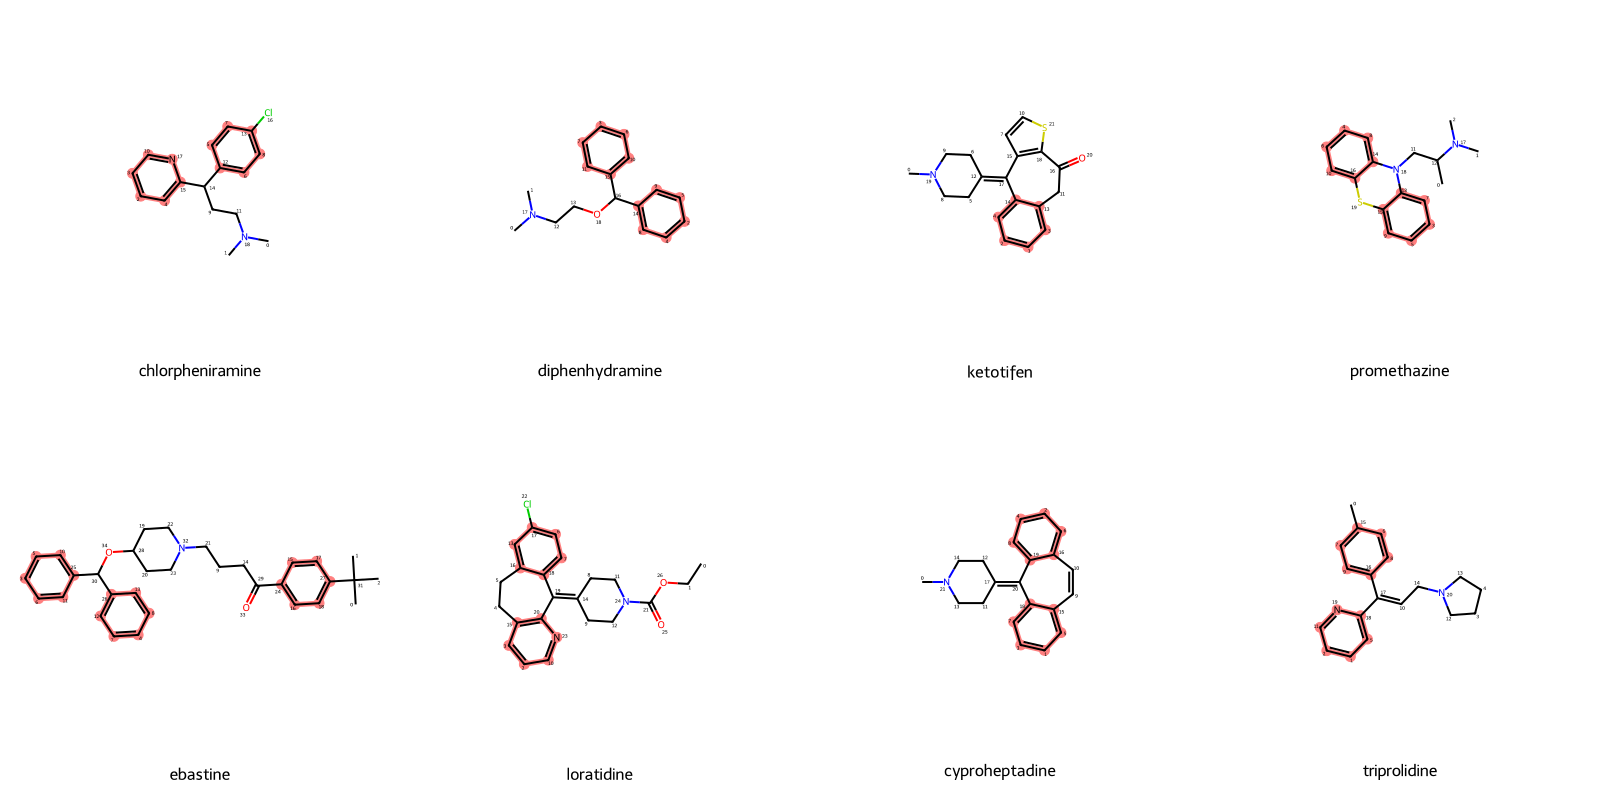

In [19]:
antihistamines = {
    'chlorpheniramine': 'InChI=1S/C16H19ClN2/c1-19(2)12-10-15(16-5-3-4-11-18-16)13-6-8-14(17)9-7-13/h3-9,11,15H,10,12H2,1-2H3',
    'diphenhydramine': 'InChI=1S/C17H21NO/c1-18(2)13-14-19-17(15-9-5-3-6-10-15)16-11-7-4-8-12-16/h3-12,17H,13-14H2,1-2H3',
    'ketotifen': 'InChI=1S/C19H19NOS/c1-20-9-6-13(7-10-20)18-15-5-3-2-4-14(15)12-17(21)19-16(18)8-11-22-19/h2-5,8,11H,6-7,9-10,12H2,1H3',
    'promethazine': 'InChI=1S/C17H20N2S/c1-13(18(2)3)12-19-14-8-4-6-10-16(14)20-17-11-7-5-9-15(17)19/h4-11,13H,12H2,1-3H3',
    'ebastine': 'InChI=1S/C32H39NO2/c1-32(2,3)28-18-16-25(17-19-28)30(34)15-10-22-33-23-20-29(21-24-33)35-31(26-11-6-4-7-12-26)27-13-8-5-9-14-27/h4-9,11-14,16-19,29,31H,10,15,20-24H2,1-3H3',
    'loratidine': 'InChI=1S/C22H23ClN2O2/c1-2-27-22(26)25-12-9-15(10-13-25)20-19-8-7-18(23)14-17(19)6-5-16-4-3-11-24-21(16)20/h3-4,7-8,11,14H,2,5-6,9-10,12-13H2,1H3',
    'cyproheptadine': 'InChI=1S/C21H21N/c1-22-14-12-18(13-15-22)21-19-8-4-2-6-16(19)10-11-17-7-3-5-9-20(17)21/h2-11H,12-15H2,1H3',
    'triprolidine': 'InChI=1S/C19H22N2/c1-16-7-9-17(10-8-16)18(19-6-2-3-12-20-19)11-15-21-13-4-5-14-21/h2-3,6-12H,4-5,13-15H2,1H3/b18-11+'
}

# convert InChI strings to RDKit molecules
antihistamines_mols = [Chem.MolFromInchi(inchi) for inchi in antihistamines.values()]

query_smarts = "c1cccc[c,n]1"  # SMARTS for benzene or pyridine ring
#query_smarts = '[$(c1ccccc1),$(c1ccccn1)]'  # another way to query SMARTS for benzene or pyridine ring
# the above uses recursive SMARTS which allos you to query for either benzene or pyridine in the same query

highlight_substructures_with_bonds(antihistamines_mols, query_smarts, legends=list(antihistamines.keys()), molsPerRow = 4, subImgSize=(400, 400))


Recursive SMARTS is a feature of the language that allows you to build complex atom-level queries by embedding entire substructure patterns inside a single atom definition.

The syntax is `[$(<SMARTS>)]`

Where:
* The `$` indicates a recursive SMARTS query.
* The inner(...) is a full SMARTS pattern.

 The following code will search for any molecule that includes a piperidine or a pyrrolidine ring. Note that the way our function works, it will highlight the nitrogen atom of interest and not all the bonds.

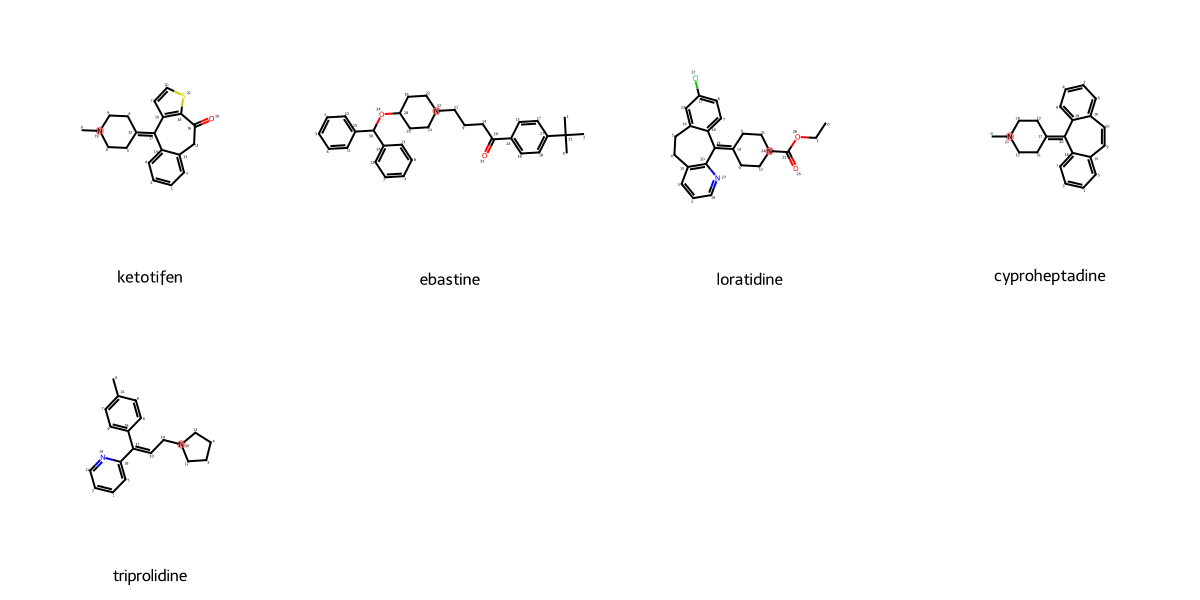

In [20]:
# embedded substructure search for piperidine or pyrrolidine rings in antihistamines
query_smarts = '[$(N1CCCCC1),$(N1CCCC1)]' 

highlight_substructures_with_bonds(antihistamines_mols, query_smarts, legends=list(antihistamines.keys()), molsPerRow = 4, subImgSize=(300, 300))



The following query seeks to identify any aromatic carbon in a ring that is separated from an aromatic nitrogen, or any nitrogen in a pyrrolidine ring. 

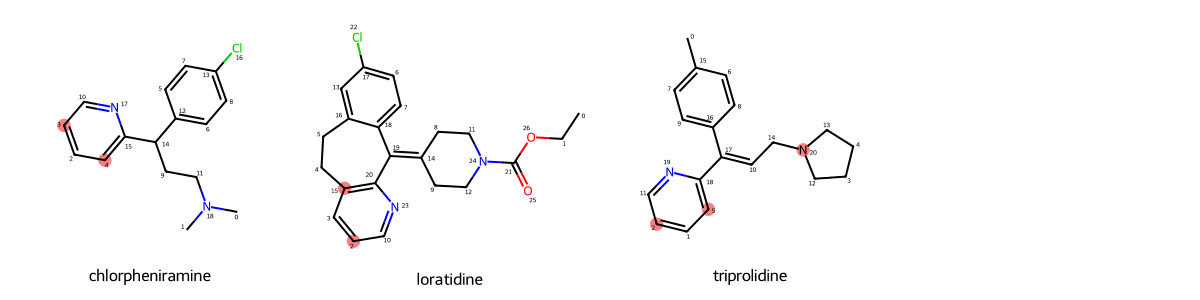

In [21]:
query_smarts = '[$(c1cnccc1),$(N1CCCC1)]'  # another way

highlight_substructures_with_bonds(antihistamines_mols, query_smarts, legends=list(antihistamines.keys()), molsPerRow = 4, subImgSize=(300, 300))


<div class="alert alert-block alert-warning">
<strong>Check your understanding</strong><br>

Look up the SMARTS for an ester. Display all antihistamines that contain an ester. 

<details>
<summary>Answer</summary>
Your code should display only the molecules that contain esters: loratidine
</div>

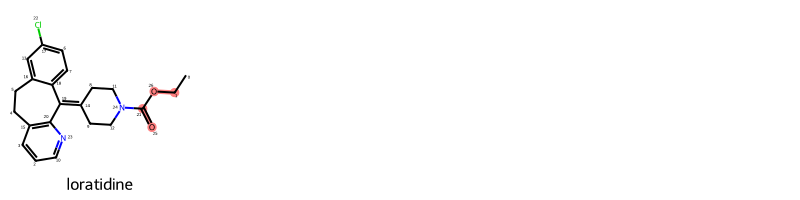

In [22]:
# write your code here

#key

antihistamines_mols = [Chem.MolFromInchi(inchi) for inchi in antihistamines.values()]
ester_smarts = '[C](=O)[O][C]'   # SMARTS for ester functional group
# ester_smarts = 'C(=O)OC'        # this is a SMILES string for ester functional group, not SMARTS. It will still work but not as intended.
highlight_substructures_with_bonds(antihistamines_mols, ester_smarts, legends=list(antihistamines.keys()), molsPerRow = 4, subImgSize=(200, 200))


The following widget allows us to interact with a list of molecules and practice using SMARTS to find molecules that incorporate substructures of our choosing. If you click on the magnifying glass icon 🔎 below, you can search by SMARTS.

Try the following SMARTS:

* [Nr6]  Non-armoatic nitrogen in a 6 membered non-aromatic ring
* [sr5]  Aromatic sulfur in a 5 membered ring
* [CX4]  Carbon with bonds to any four other atoms
* [CD4]  Quaternary carbon
* [#7,#8] Hydrogen bond acceptors
* [#7,#8;!H0] Hydrogen bond donors (oxygen or nitrogen must have hydrogen bonded to it)
* [#6^2] sp<sup>2</sup> hybridized carbon
* [#6z] carbpn with a heteroatom neighbor

In [23]:
import mols2grid
#mols2grid.display(molecules)
mols2grid.display(antihistamines_mols)

<div class="alert alert-block alert-success">
<center><H1>Homework</H1></center>

Some resources for SMARTS include:

The canonical reference for SMARTS is the [Daylight Theory Manual](https://www.daylight.com/dayhtml/doc/theory/). 
The [RDKit Book](https://www.rdkit.org/docs/RDKit_Book.html) which explain how it is implemented in RDKit


Use it as a guide and any other internet resources to help you define SMARTS queries for this homework assignment.


<div class="alert alert-block alert-success">

1) The following code cell has three molecules that contain carbon oxygen bonds. Only one of them is an alcohol. A student proposed the following code to display all alcohols in the list (based on the SMILES string for an alcohol). Change the SMARTS, and rerun the cell to only return a true value for the alcohol.

In [ ]:
InChiList = ["InChI=1S/C12H18BrOSe/c1-3-4-9-15(13)12-8-6-5-7-11(12)10-14(15)2/h5-8H,3-4,9-10H2,1-2H3/q+1","InChI=1S/C7H13NO2/c1-3-8-4-2-7(1)9-5-6-10-7/h8H,1-6H2","InChI=1S/C4H9NO/c6-4-1-2-5-3-4/h4-6H,1-3H2"]
myMols = [Chem.MolFromInchi(inchi) for inchi in InChiList]
alchohol_SMARTS = "CO"  # incorrect SMARTS for alcohol functional group
alcoholquery = Chem.MolFromSmarts(alchohol_SMARTS) 
matches = [] 
for mol in myMols:
    if mol.HasSubstructMatch(alcoholquery):  
        matches.append(mol)  
Draw.MolsToGridImage(matches, molsPerRow=5, subImgSize=(200, 200))


<div class="alert alert-block alert-success">

2) Using the following code block, write a SMARTS query to identify any molecules in `myMols` that have a positive charge.

In [ ]:
positive_SMARTS = "Add your SMARTS here" 
positivequery = Chem.MolFromSmarts(positive_SMARTS) 
matches = [] 
for mol in myMols:
    if mol.HasSubstructMatch(positivequery):  
        matches.append(mol)  
Draw.MolsToGridImage(matches, molsPerRow=5, subImgSize=(200, 200))

<div class="alert alert-block alert-success">

3) Change the following code cell so that it highlights any ether or dialkyl amino substructures in `myMols`. 

In [ ]:
mySMARTS = "Add your SMARTS here" 

highlight_substructures_with_bonds(myMols, mySMARTS)


<div class="alert alert-block alert-success">
4) The following cell contains a list of CIDs from PubChem. Find matches for the following criteria in the list, and return all CIDs that match that criteria.

* all molecules that contain a carboxylate
* all molecules that contain a triple bond
* all molecules that contain heterocycles

In [1]:
CIDs = [119389,5991,135519560,50994057,3016,68617,2764,1983,5288826,5460164,242,5462328,3386,2912,26757,89594,145352036]
# write your code here

# Acknowledgments
